In [5]:
import pandas as pd
from pandas import DataFrame
import numpy as np
from sklearn.linear_model import RidgeCV,Ridge,Lasso,LassoCV,lasso_path,lars_path,ElasticNet,ElasticNetCV
from sklearn.model_selection import train_test_split,validation_curve,cross_val_score
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import  make_scorer
from itertools import cycle
import warnings
warnings.filterwarnings('ignore')

In [6]:
# source: http://www.science.smith.edu/~jcrouser/SDS293/labs/lab10-py.html
data=pd.read_csv('./data/RealEstate.csv')  

alphas = 10**np.linspace(10,-2,100)*0.5
# alphas = np.logspace(-3, -1, 30)
print("range of alphas:",min(alphas),max(alphas))
data.drop(columns=["MLS","Location"],inplace=True)
dummies=pd.get_dummies(data.Status)
data=pd.concat([data,dummies],axis=1).drop(columns=["Status"])
# display(data)

X=data[data.columns.difference(['Price'])]
y=data[["Price"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
ridgeCV=RidgeCV(alphas=alphas, normalize = True,cv=5)
ridgeCV.fit(X_train,y_train)
optimal_alpha=ridgeCV.alpha_
print("optimal alpha: ",optimal_alpha)
ridge= Ridge(alpha=optimal_alpha,normalize=True)
model=ridge.fit(X,y)
mse=mean_squared_error(y,ridge.predict(X))
r2=ridge.score(X,y)
print("mse for ridge regression: ",mse)
print("r2 for ridge regression: ",r2)


ridge.fit(X_train,y_train)
# coeff=pd.Series(ridge.coef_, index = X.columns)
display(ridge.coef_)
display(DataFrame(list(zip(ridge.coef_[0], X_train.columns))))



range of alphas: 0.005 5000000000.0
optimal alpha:  0.10772173450159389
mse for ridge regression:  21846054179.982834
r2 for ridge regression:  0.8204506806336742


array([[ 50168.63728641,   3632.59579198, -12274.49178788,
          1832.88750652,  57635.40428256, -19686.81891839,
           207.59314895]])

,0,1
0,50168.637286,Bathrooms
1,3632.595792,Bedrooms
2,-12274.491788,Foreclosure
3,1832.887507,Price/SQ.Ft
4,57635.404283,Regular
5,-19686.818918,Short Sale
6,207.593149,Size


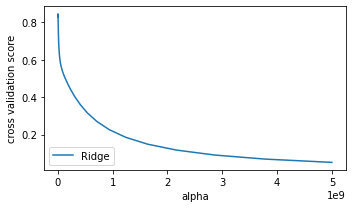

In [4]:
plt.figure(figsize=(5, 3))

for Model in [Ridge]:
    scores = [cross_val_score(Model(alpha),X_train,y_train,cv=5).mean()
            for alpha in alphas]
    plt.plot(alphas, scores, label=Model.__name__)

plt.legend(loc='lower left')
plt.xlabel('alpha')
plt.ylabel('cross validation score')
plt.tight_layout()
plt.show()

optimal alpha:  100.8230376891931
mean squared error <function mean_squared_error at 0x11e647e50>
coeff by lasso: [14743.63086893    -0.             0.          2018.14174203
 42604.79048105 -1962.03789044   252.46758038]


,0,1
0,14743.630869,Bathrooms
1,-0.000000,Bedrooms
2,0.000000,Foreclosure
3,2018.141742,Price/SQ.Ft
4,42604.790481,Regular
5,-1962.037890,Short Sale
6,252.467580,Size


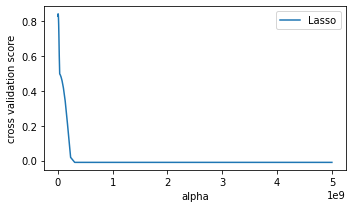

In [7]:
lassocv = LassoCV(alphas = None, cv = 5, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train.values.flatten())
optimal_alpha=lassocv.alpha_
print("optimal alpha: ",optimal_alpha)
lasso = Lasso(max_iter = 10000, normalize = True,)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mse=mean_squared_error(y_test.values.flatten(), lasso.predict(X_test))
print("mean squared error",mean_squared_error)
alphas_lasso, coefs_lasso, _ = lasso_path(X_train, y_train, alpha=lassocv.alpha_)
print("coeff by lasso:",lasso.coef_)
display(DataFrame(list(zip(lasso.coef_, X_train.columns))))

plt.figure(figsize=(5, 3))

for Model in [Lasso]:
    scores = [cross_val_score(Model(alpha),X_train,y_train,cv=5).mean()
            for alpha in alphas]
    plt.plot(alphas, scores, label=Model.__name__)

plt.legend(loc='upper right')
plt.xlabel('alpha')
plt.ylabel('cross validation score')
plt.tight_layout()
plt.show()


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(781, 7)
(781,)
.

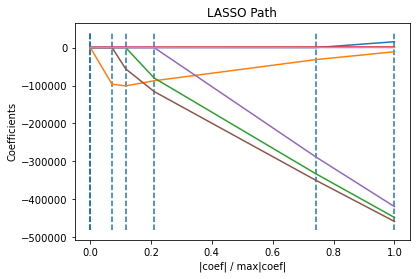

In [8]:
# source: 
X=X.to_numpy()
y=y.values.flatten()
print(type(X))
print(type(y))
print(X.shape)
print(y.shape)
_, _, coefs = lars_path(X, y, method='lasso', verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.show()

In [9]:
# source: https://www.datatechnotes.com/2019/08/elasticnet-regression-example-in-python.html
regr=ElasticNetCV(alphas=alphas,cv=5,l1_ratio=0.5)
regr.fit(X_train, y_train)
print("optimal alpha:",regr.alpha_)
en=ElasticNet(alpha=regr.alpha_,l1_ratio=0.5)
en.fit(X_train,y_train)
print(en.coef_)
display(DataFrame(list(zip(en.coef_, X_train.columns))))

optimal alpha: 466.30167344161
[ 1.57649644e+01 -3.57474231e+00 -1.64975771e+00  2.04507392e+03
  2.07069346e+01 -1.80568254e+01  2.67275949e+02]


,0,1
0,15.764964,Bathrooms
1,-3.574742,Bedrooms
2,-1.649758,Foreclosure
3,2045.073923,Price/SQ.Ft
4,20.706935,Regular
5,-18.056825,Short Sale
6,267.275949,Size
